In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# from carps.analysis.process_data import get_interpolated_performance_df, load_logs, process_logs
from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df, load_logs, process_logs


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print(df_trials["scenario"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


# rundir = "../runs"
# df, df_cfg = load_logs(rundir=rundir)
# df = pd.read_csv("../logs_combined.csv")
# df_cfg = pd.read_csv("../logs_combined_cfg.csv")

paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MOfull": {
        "full": ["../runs_MO"]
    },
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    }
}
subset = "BBsubset"
problem_prefix = "blackbox/30"

scenarios = ["blackbox", "multi-fidelity"]

def load_set(paths: list[str], set_id: str = "unknown") -> tuple[pd.DataFrame, pd.DataFrame]:
    df = pd.concat([pd.read_parquet(Path(p) / "logs.parquet") for p in paths]).reset_index(drop=True)
    df_cfg = pd.concat([pd.read_parquet(Path(p) / "logs_cfg.parquet") for p in paths]).reset_index(drop=True)
    df["set"] = set_id
    return df, df_cfg

loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
df_cfg = pd.concat([d for _, d in loaded]).reset_index(drop=True)



df = normalize_logs(df)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")


[12:02:42] INFO     Start normalization...                                                       ]8;id=426276;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=703398;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#310\310]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=130509;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=906330;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#311\311]8;;\

           INFO     Normalize cost...                                                            ]8;id=835931;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=364324;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#313\313]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=227246;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=659071;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#315\315]8;;\

           INFO     Normalize time...                                                            ]8;id=312867;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=216418;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#317\317]8;;\

[12:02:45] INFO     Done.                                                                        ]8;id=253165;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=117212;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#320\320]8;;\

Index(['n_trials', 'n_function_calls', 'trial_info__config',
       'trial_info__instance', 'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'seed',
       'benchmark_id', 'problem_id', 'optimizer_id', 'problem.model_id',
       'problem.dataset_id', 'problem.surrogates_dir', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.dimension',
       'problem.fid', 'problem.instance', 'problem.seed', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'experiment_id', 'set',
       'n_trials_norm', 'trial_value__cost_norm', 'trial_value__cost_inc_norm',
       'time_norm'],
      dtype='object')
['Optuna' 'Nevergrad-CMA-ES' 'SMAC3-BlackBoxFacade' 'RandomSearch'
 'SMAC3-1.4-BlackBoxFacade' 'SyneTune-BO' '

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=305220;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=125276;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#359\359]8;;\
                    budget.                                                                                        

[12:02:50] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=494747;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=780022;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#359\359]8;;\
                    budget.                                                                                        

In [2]:
# from pymoo.indicators.hv import HV

# def calc_mo_indicators(df: pd.DataFrame) -> pd.DataFrame:
#     new_df = []
#     for gid, gdf in df.groupby(by=["scenario", "problem_id"]):
#         scenario, problem_id = gid
#         if scenario == "multi-objective":
#             gdf["trial_value__cost_raw"] = gdf["trial_value__cost_raw"].apply(eval)
#             cost = gdf["trial_value__cost_raw"].to_numpy()
#             cost = np.concatenate(cost).reshape(-1, len(cost[0]))
#             reference_point = np.max(cost, axis=0)
#             hv_history = []
#             for i in range(len(cost)):
#                 ind = HV(ref_point=reference_point, pf=cost)
#                 hv_history.append(ind(cost[:i]))
#             gdf["trial_value__cost_hv"] = hv_history
#         new_df.append(gdf)
#     return pd.concat(new_df).reset_index(drop=True)

# df_mo = calc_mo_indicators(df)


----------------------------------------------------------------------------------------------------
('blackbox', 'dev')


[12:02:56] INFO     Lost following experiments: optimizer_id                                    ]8;id=278485;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=432006;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#106\106]8;;\
                    HEBO  Nevergrad-CMA-ES  Optuna  \                                                              
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120   NaN          0.477053                          
                    NaN                                                                                            
                                                                                                                   
                    optimizer_id                                   RandomSearch  \                                 
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120      0.453472                                    
                                                                                                                   
                    optimizer_id                                   SMAC3-1.4-BlackBoxFacade  \                     
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120                  0.466012                        
                                                                                                                   
                    optimizer_id                                   SMAC3-BlackBoxFacade  \                         
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120               0.45513                            
                                                                                                                   
                    optimizer_id                                   SMAC3-HPOFacade  \                              
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120         0.460723                                 
                                                                                                                   
                    optimizer_id                                   Scikit_Optimize  SyneTune-BO                    
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120              NaN     0.481661                    

Rejecting null hypothesis that data is normal for column HEBO (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Optuna (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-1.4-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Scikit_Optimize (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000000<0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test.

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:222: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_line([(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)], linewidth=0.7)
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:227: FutureWarning: Serie

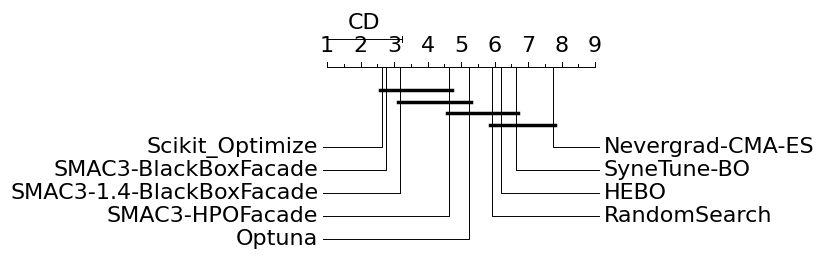


\begin{table}[h]
    \centering
    \begin{tabular}{lrrllll}
\toprule
 & MR & MED & MAD & CI & $\gamma$ & Magnitude \\
\midrule
Scikit\_Optimize & 2.655 & -0.856 & 0.089 & [-0.947, -0.662] & 0.000 & negligible \\
SMAC3-BlackBoxFacade & 2.759 & -0.854 & 0.092 & [-0.946, -0.576] & -0.019 & negligible \\
SMAC3-1.4-BlackBoxFacade & 3.172 & -0.851 & 0.096 & [-0.939, -0.595] & -0.041 & negligible \\
SMAC3-HPOFacade & 4.655 & -0.848 & 0.098 & [-0.937, -0.497] & -0.062 & negligible \\
Optuna & 5.241 & -0.847 & 0.093 & [-0.937, -0.498] & -0.066 & negligible \\
RandomSearch & 5.931 & -0.846 & 0.093 & [-0.937, -0.497] & -0.079 & negligible \\
HEBO & 6.207 & -0.845 & 0.100 & [-0.937, -0.497] & -0.077 & negligible \\
SyneTune-BO & 6.638 & -0.845 & 0.101 & [-0.937, -0.497] & -0.077 & negligible \\
Nevergrad-CMA-ES & 7.741 & -0.845 & 0.101 & [-0.937, -0.497] & -0.077 & negligible \\
\bottomrule
\end{tabular}
    \caption{Summary of populations}
    \label{stat_results_blackbox_dev}
\end{table}

Scik

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


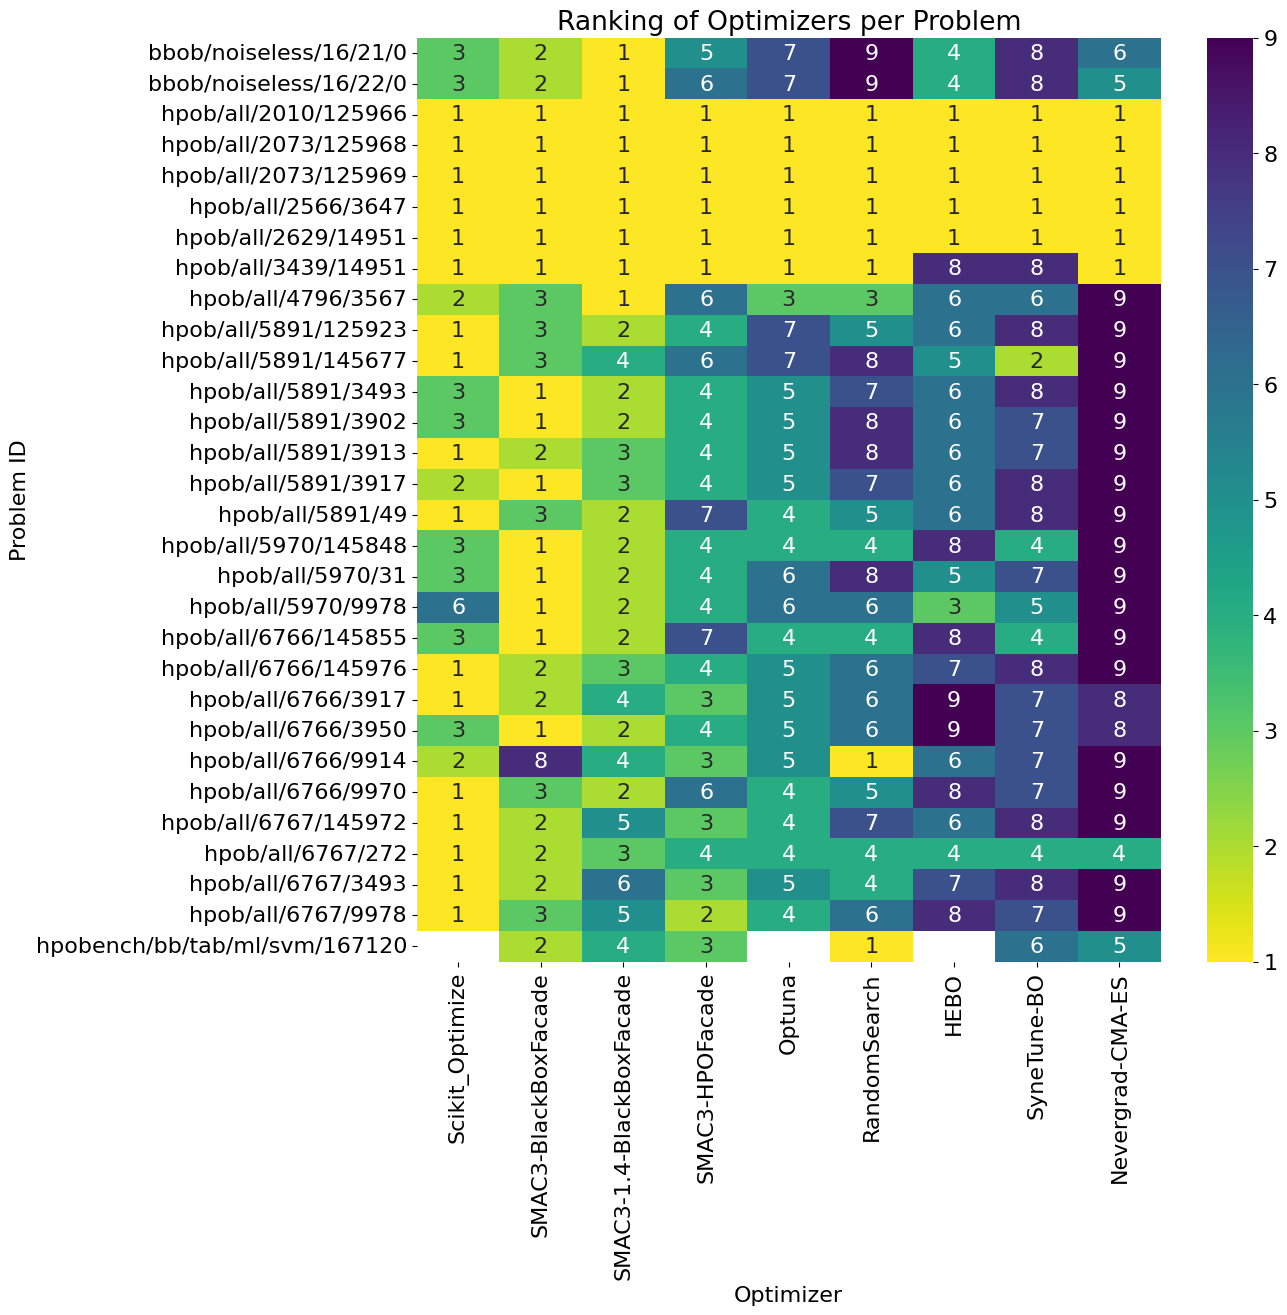

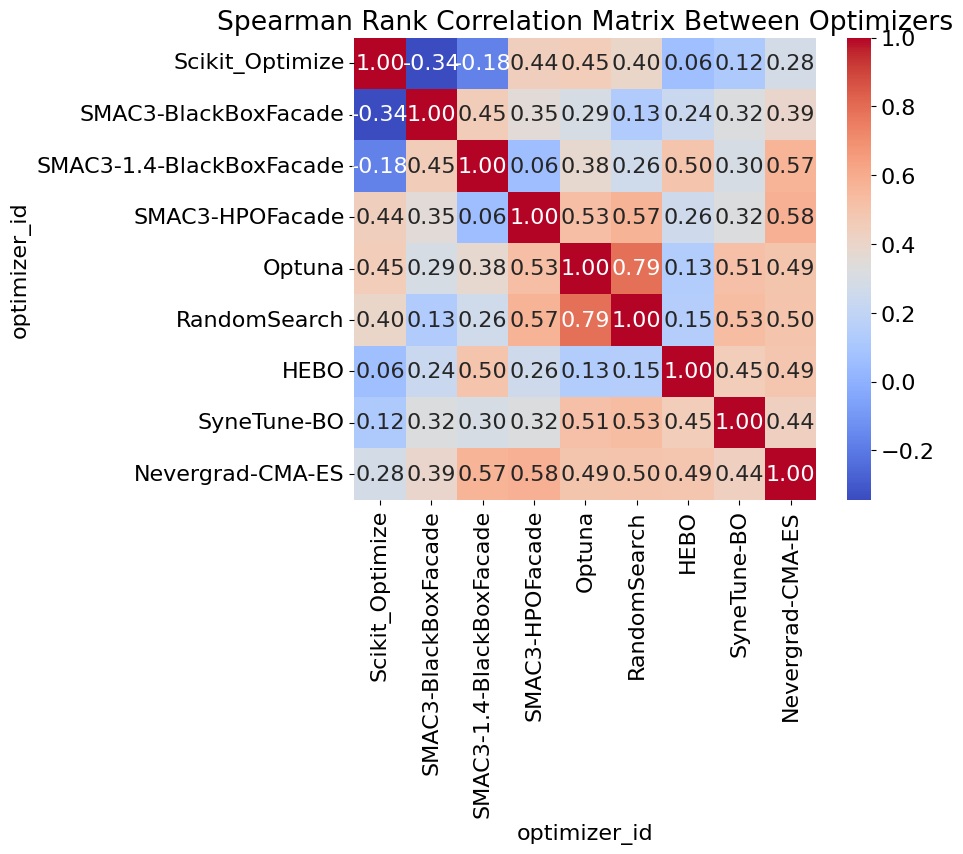

----------------------------------------------------------------------------------------------------
('blackbox', 'test')


[12:03:02] INFO     Lost following experiments: optimizer_id                                    ]8;id=895119;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=242925;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#106\106]8;;\
                    HEBO  Nevergrad-CMA-ES  Optuna  \                                                              
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965   NaN          0.097855                          
                    NaN                                                                                            
                                                                                                                   
                    optimizer_id                                   RandomSearch  \                                 
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965      0.098143                                    
                                                                                                                   
                    optimizer_id                                   SMAC3-1.4-BlackBoxFacade  \                     
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965                  0.097766                        
                                                                                                                   
                    optimizer_id                                   SMAC3-BlackBoxFacade  \                         
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965              0.097766                            
                                                                                                                   
                    optimizer_id                                   SMAC3-HPOFacade  \                              
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965          0.09792                                 
                                                                                                                   
                    optimizer_id                                   Scikit_Optimize  SyneTune-BO                    
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965              NaN     0.104243                    

Rejecting null hypothesis that data is normal for column HEBO (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Optuna (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-1.4-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Scikit_Optimize (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000000<0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test.

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:222: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_line([(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)], linewidth=0.7)
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:227: FutureWarning: Serie

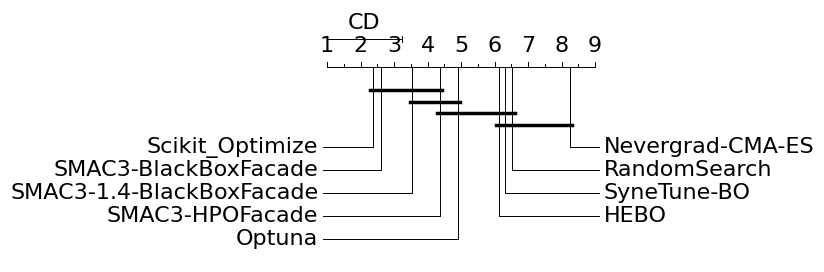


\begin{table}[h]
    \centering
    \begin{tabular}{lrrllll}
\toprule
 & MR & MED & MAD & CI & $\gamma$ & Magnitude \\
\midrule
Scikit\_Optimize & 2.362 & -0.845 & 0.102 & [-0.971, -0.548] & 0.000 & negligible \\
SMAC3-BlackBoxFacade & 2.603 & -0.824 & 0.105 & [-0.946, -0.548] & -0.136 & negligible \\
SMAC3-1.4-BlackBoxFacade & 3.534 & -0.771 & 0.097 & [-0.946, -0.547] & -0.500 & small \\
SMAC3-HPOFacade & 4.362 & -0.762 & 0.111 & [-0.946, -0.497] & -0.520 & medium \\
Optuna & 4.914 & -0.762 & 0.106 & [-0.932, -0.498] & -0.534 & medium \\
HEBO & 6.121 & -0.762 & 0.106 & [-0.931, -0.497] & -0.535 & medium \\
SyneTune-BO & 6.328 & -0.762 & 0.107 & [-0.931, -0.497] & -0.532 & medium \\
RandomSearch & 6.534 & -0.738 & 0.130 & [-0.932, -0.500] & -0.615 & medium \\
Nevergrad-CMA-ES & 8.241 & -0.713 & 0.147 & [-0.869, -0.497] & -0.702 & medium \\
\bottomrule
\end{tabular}
    \caption{Summary of populations}
    \label{stat_results_blackbox_test}
\end{table}

Scikit_Optimize             2.36

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


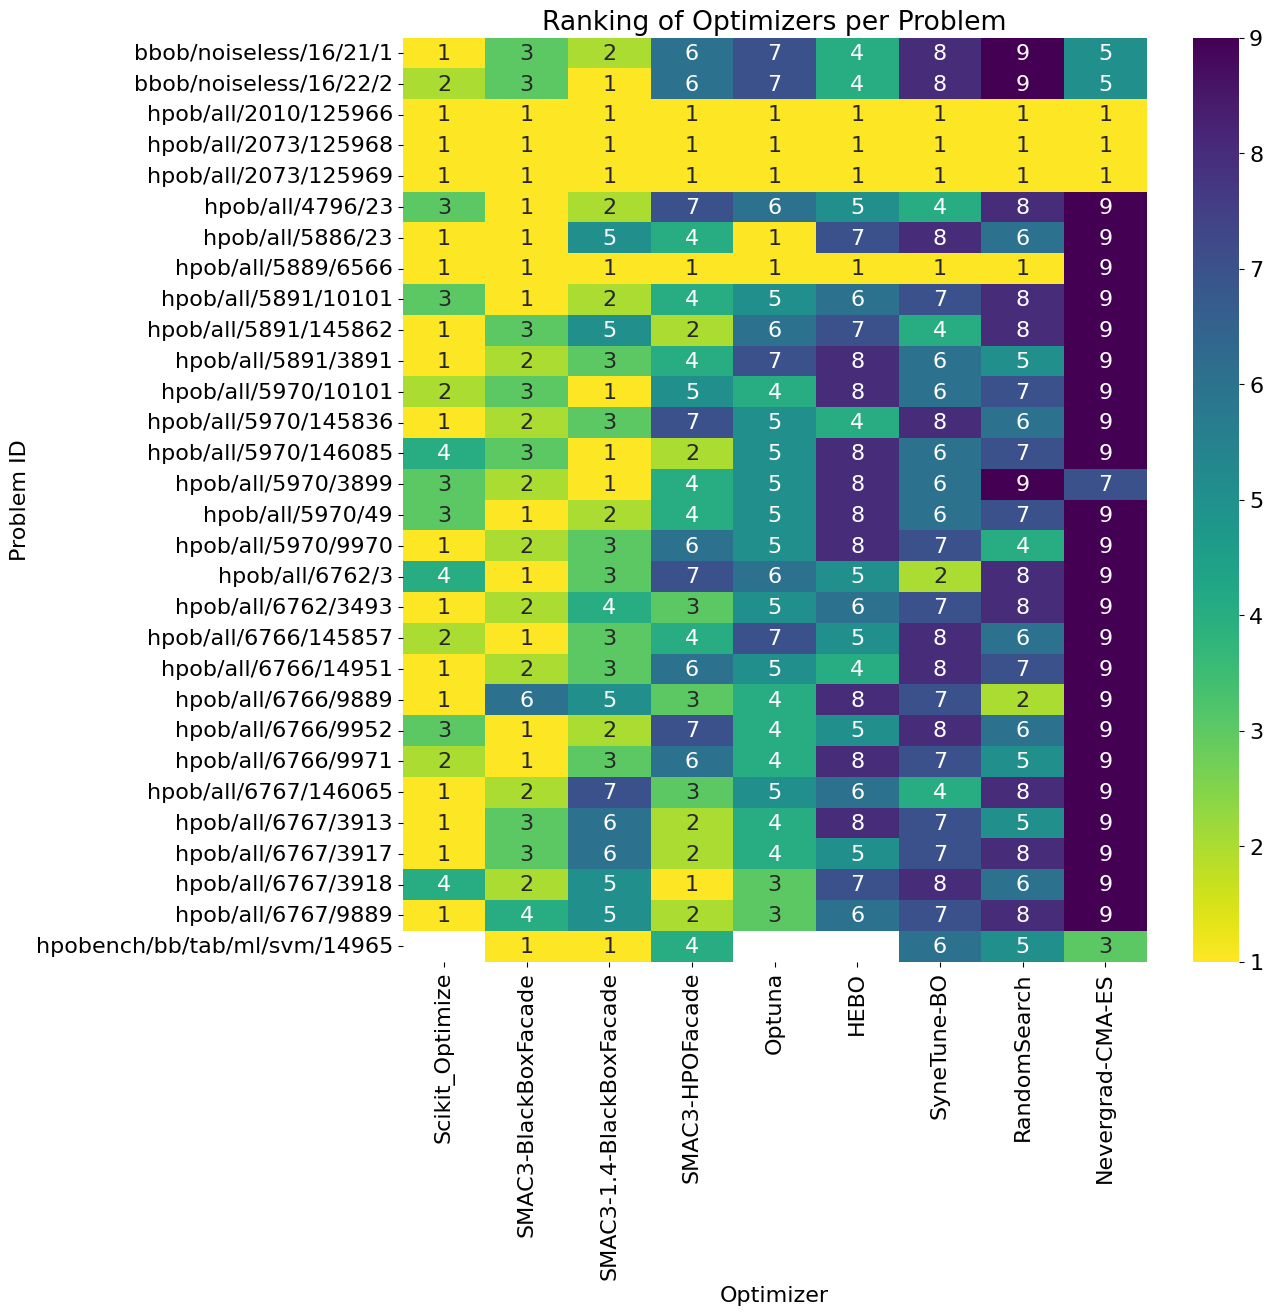

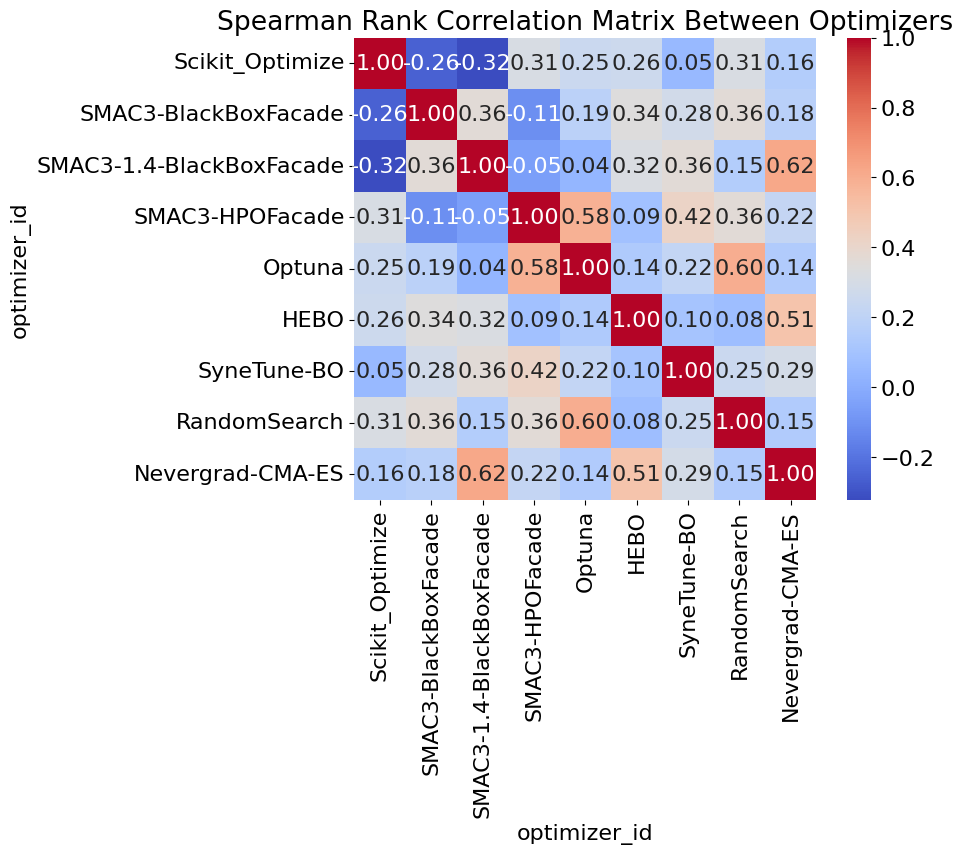

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table
from autorank._util import get_sorted_rank_groups
from carps.analysis.run_autorank import calc_critical_difference, custom_latex_table, get_df_crit
from carps.analysis.utils import savefig
import seaborn as sns

for gid, gdf in df.groupby(by=["scenario", "set"]):    
    print("-"*100)
    print(gid)
    scenario, set_id = gid
    if len(gdf) > 0:
        fpath = Path("figures/ranking")
        fpath.mkdir(exist_ok=True, parents=True)
        identifier = f"{scenario}_{set_id}"
        label = f"stat_results_{identifier}"
        result = calc_critical_difference(gdf, identifier=identifier, figsize=(8,3))
        table_str = custom_latex_table(result, label=label)
        fn = Path("figures/critd/" + label + ".tex")
        fn.write_text(table_str)
        print(table_str)
        plt.show()

        sorted_ranks, names, groups = get_sorted_rank_groups(result, reverse=False)
        print(sorted_ranks, names, groups)


        # Optionally, plot the ranked data as a heatmap
        df_crit = get_df_crit(gdf, remove_nan=False)
        df_crit = df_crit.reindex(columns=names)
        df_crit.index = [i.replace(problem_prefix + "/dev/", "") for i in df_crit.index]
        df_crit.index = [i.replace(problem_prefix + "/test/", "") for i in df_crit.index]
        ranked_df = df_crit.rank(axis=1, method='min', ascending=True)

        plt.figure(figsize=(12, 12))
        sns.heatmap(ranked_df, annot=True, fmt="g", cmap='viridis_r')
        plt.title('Ranking of Optimizers per Problem')
        plt.ylabel('Problem ID')
        plt.xlabel('Optimizer')
        savefig(plt.gcf(), fpath / f"rank_opt_per_problem_{identifier}")
        plt.show()

        # Plotting the heatmap of the rank correlation matrix
        correlation_matrix = ranked_df.corr(method='spearman')
        plt.figure(figsize=(8,6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
        plt.title('Spearman Rank Correlation Matrix Between Optimizers')
        savefig(plt.gcf(), fpath / f"spearman_rank_corr_matrix_opt_{identifier}")
        plt.show()

In [4]:

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

('blackbox', 'dev')


('blackbox', 'test')
('blackbox', 'dev')
('blackbox', 'test')


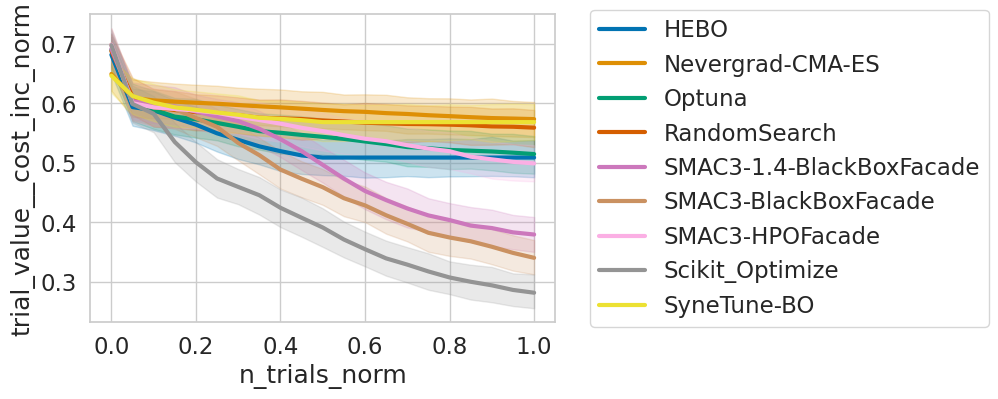

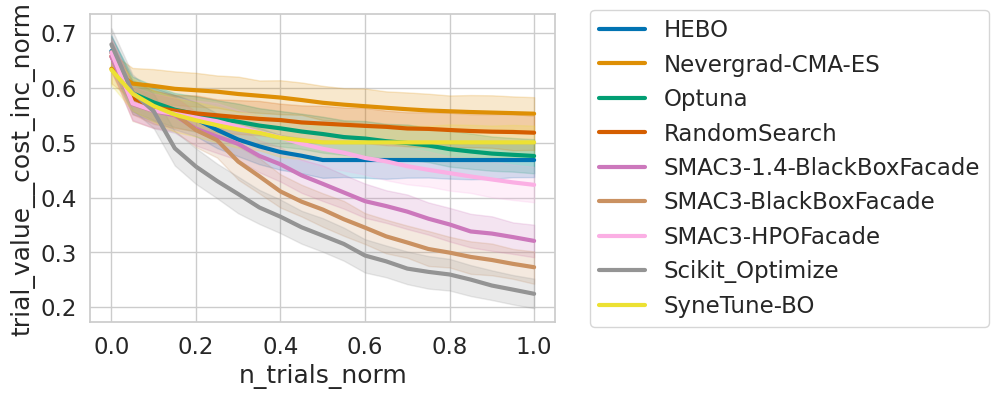

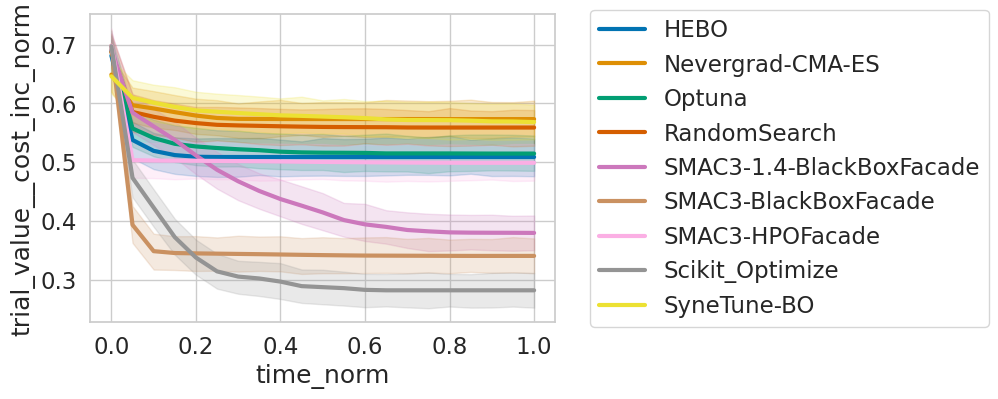

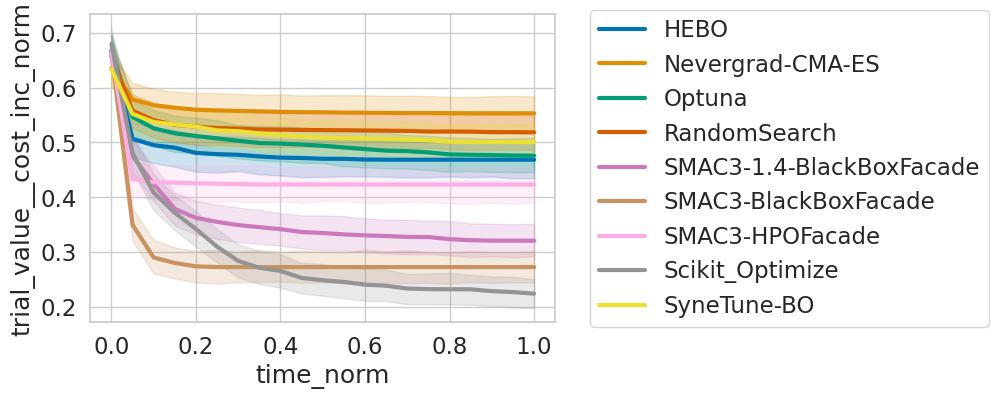

In [9]:
from carps.analysis.performance_over_time import plot_performance_over_time, setup_seaborn, savefig, get_color_palette
import seaborn as sns
import matplotlib
lineplot_kwargs = dict(linewidth=3)
for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="n_trials_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_trials.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )
for gid, gdf in perf_time.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="time_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_elapsed.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )

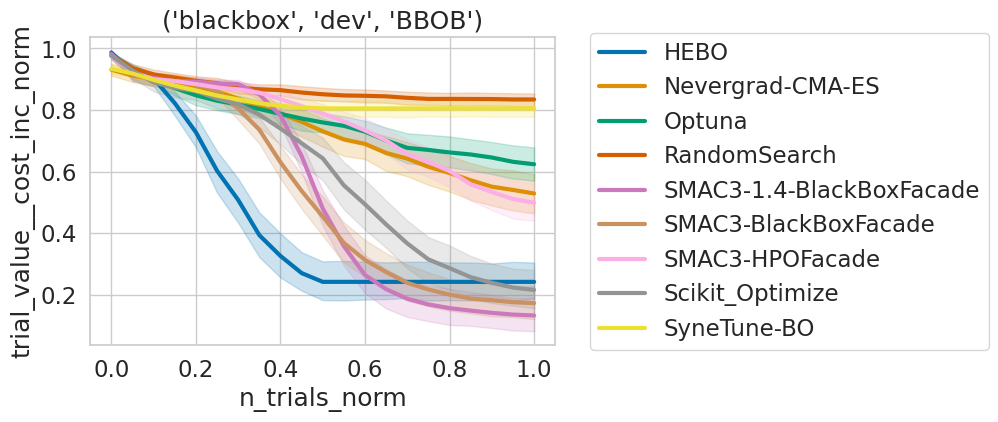

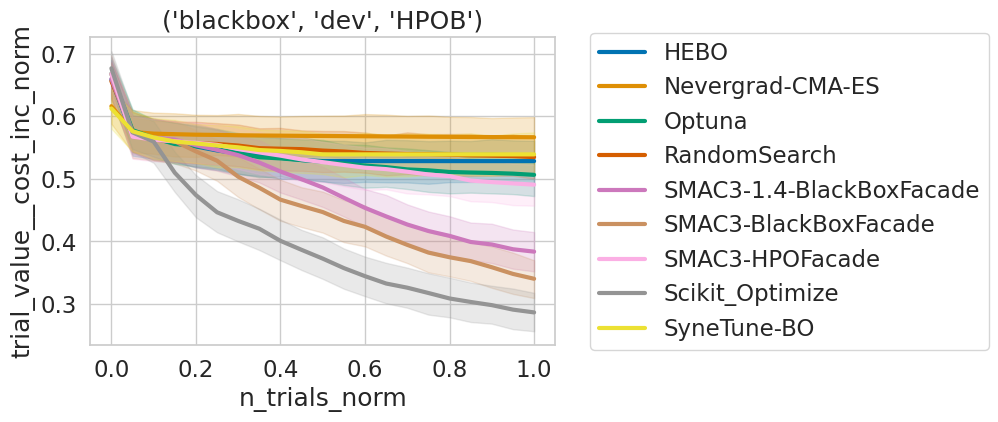

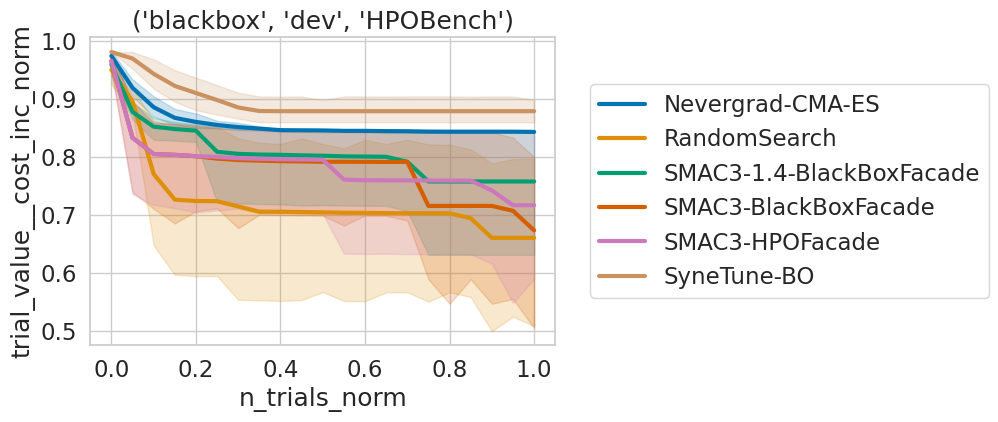

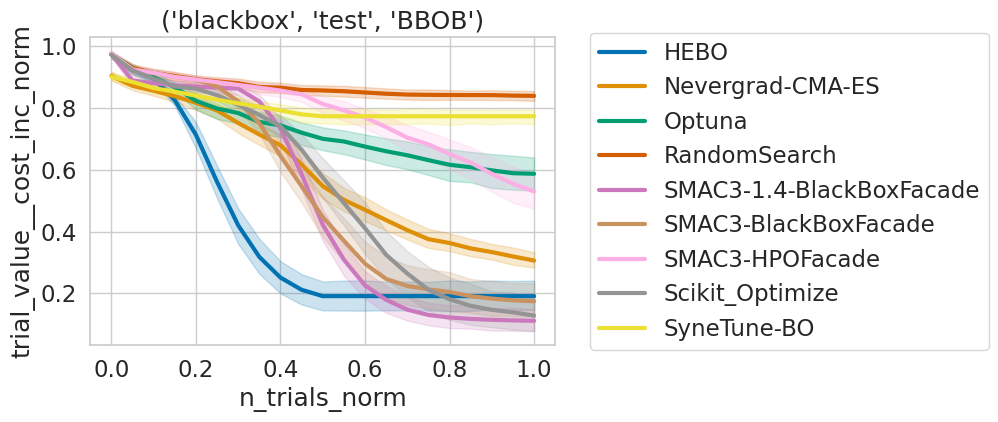

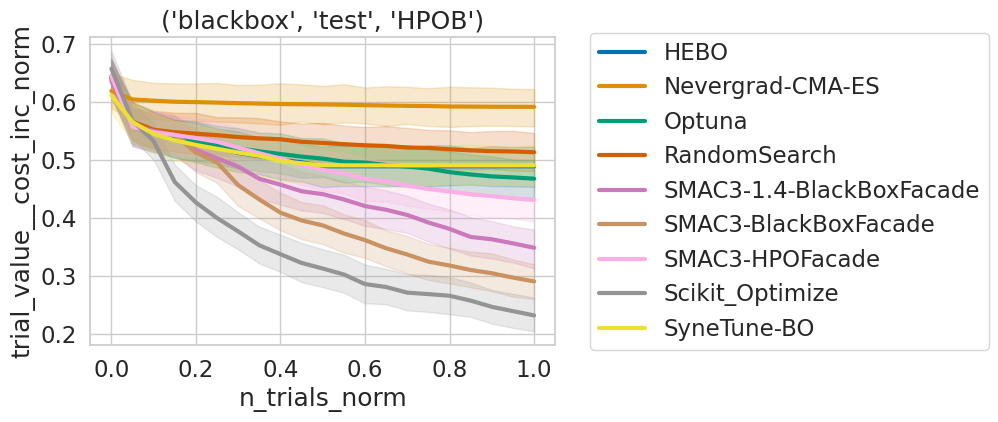

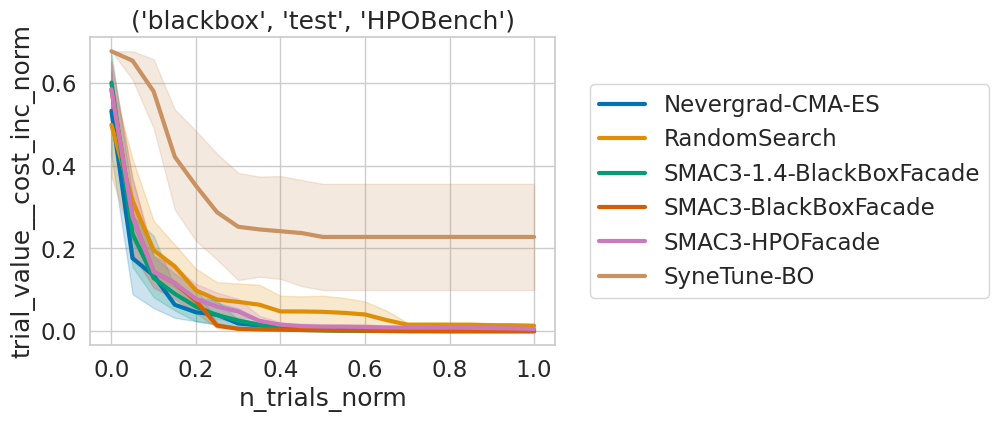

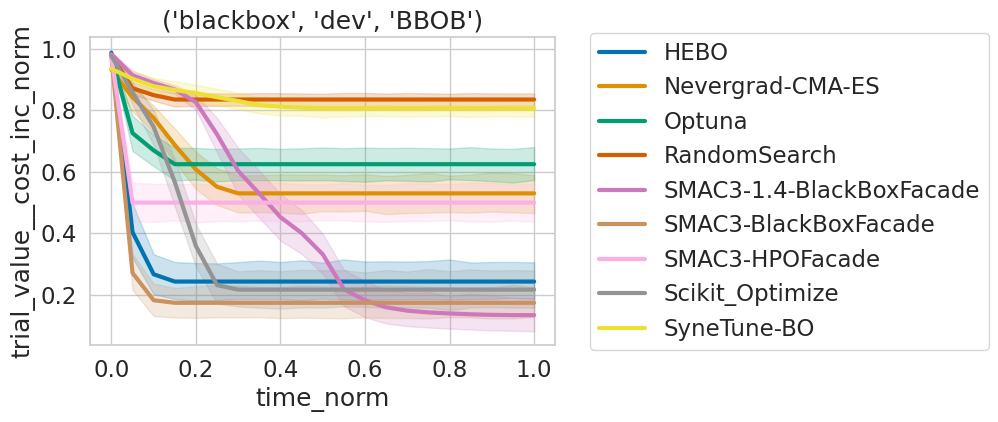

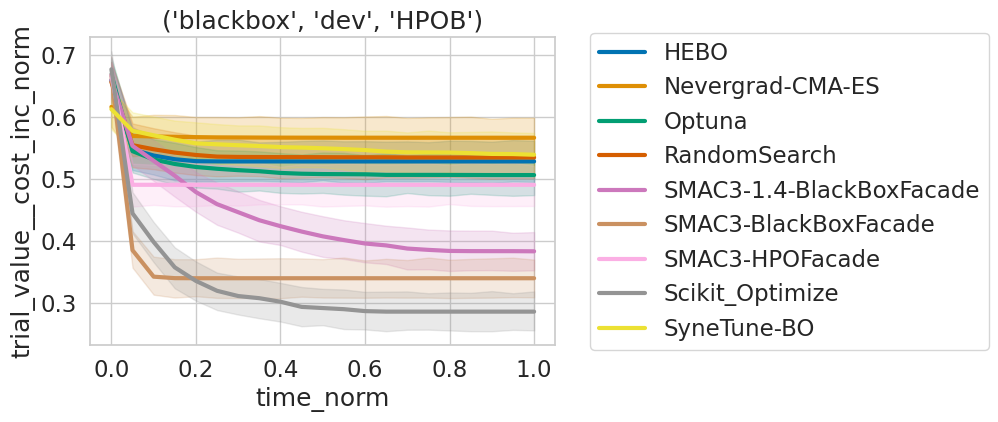

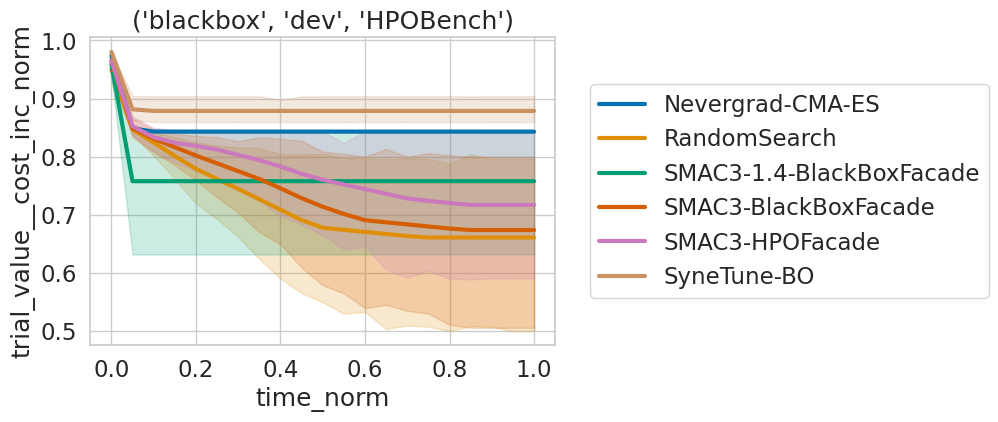

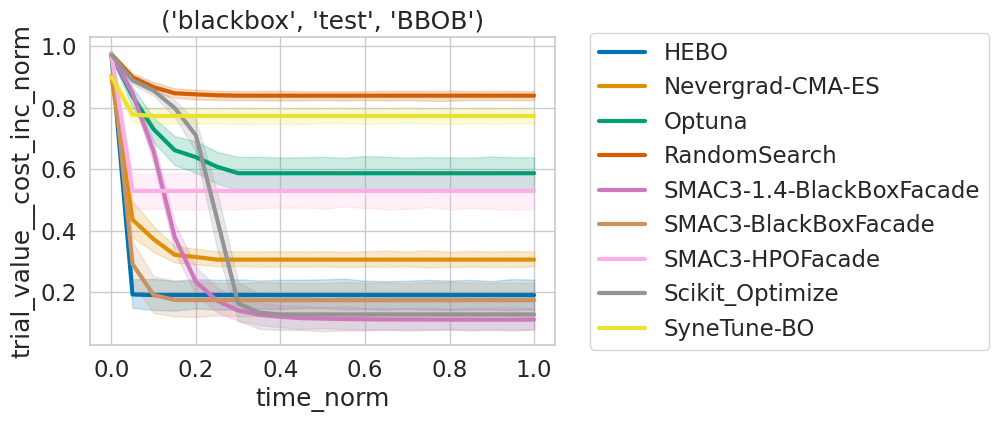

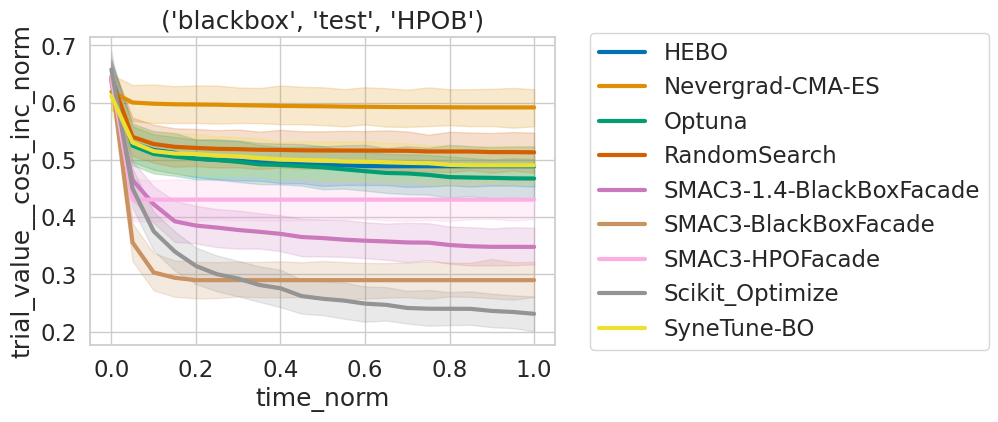

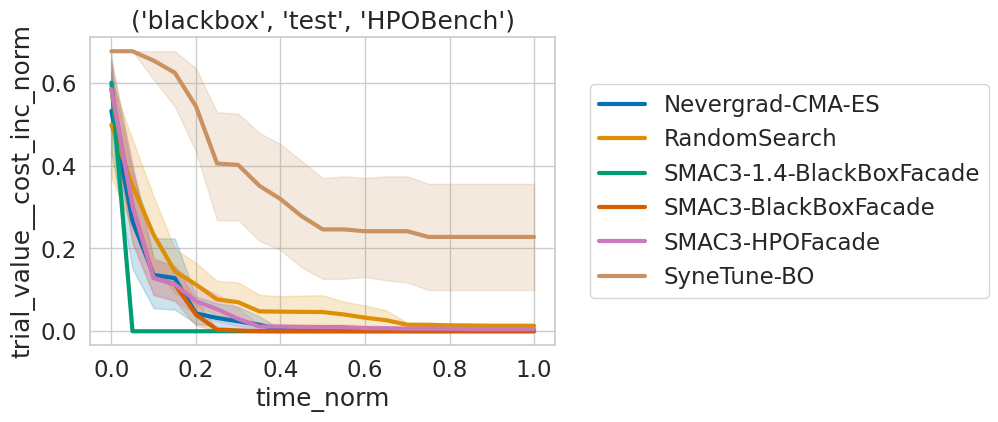

In [7]:
# Plot per benchmark
from carps.analysis.utils import get_color_palette, savefig
from carps.analysis.performance_over_time import plot_performance_over_time

palette = get_color_palette(perf)
lineplot_kwargs = dict(linewidth=3)

for gid, gdf in perf.groupby(by=["scenario", "set", "benchmark_id"]):
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by=["scenario", "set", "benchmark_id"]):    
    figure_filename = f"figures/perf_over_time/performance_over_time_elapsed_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

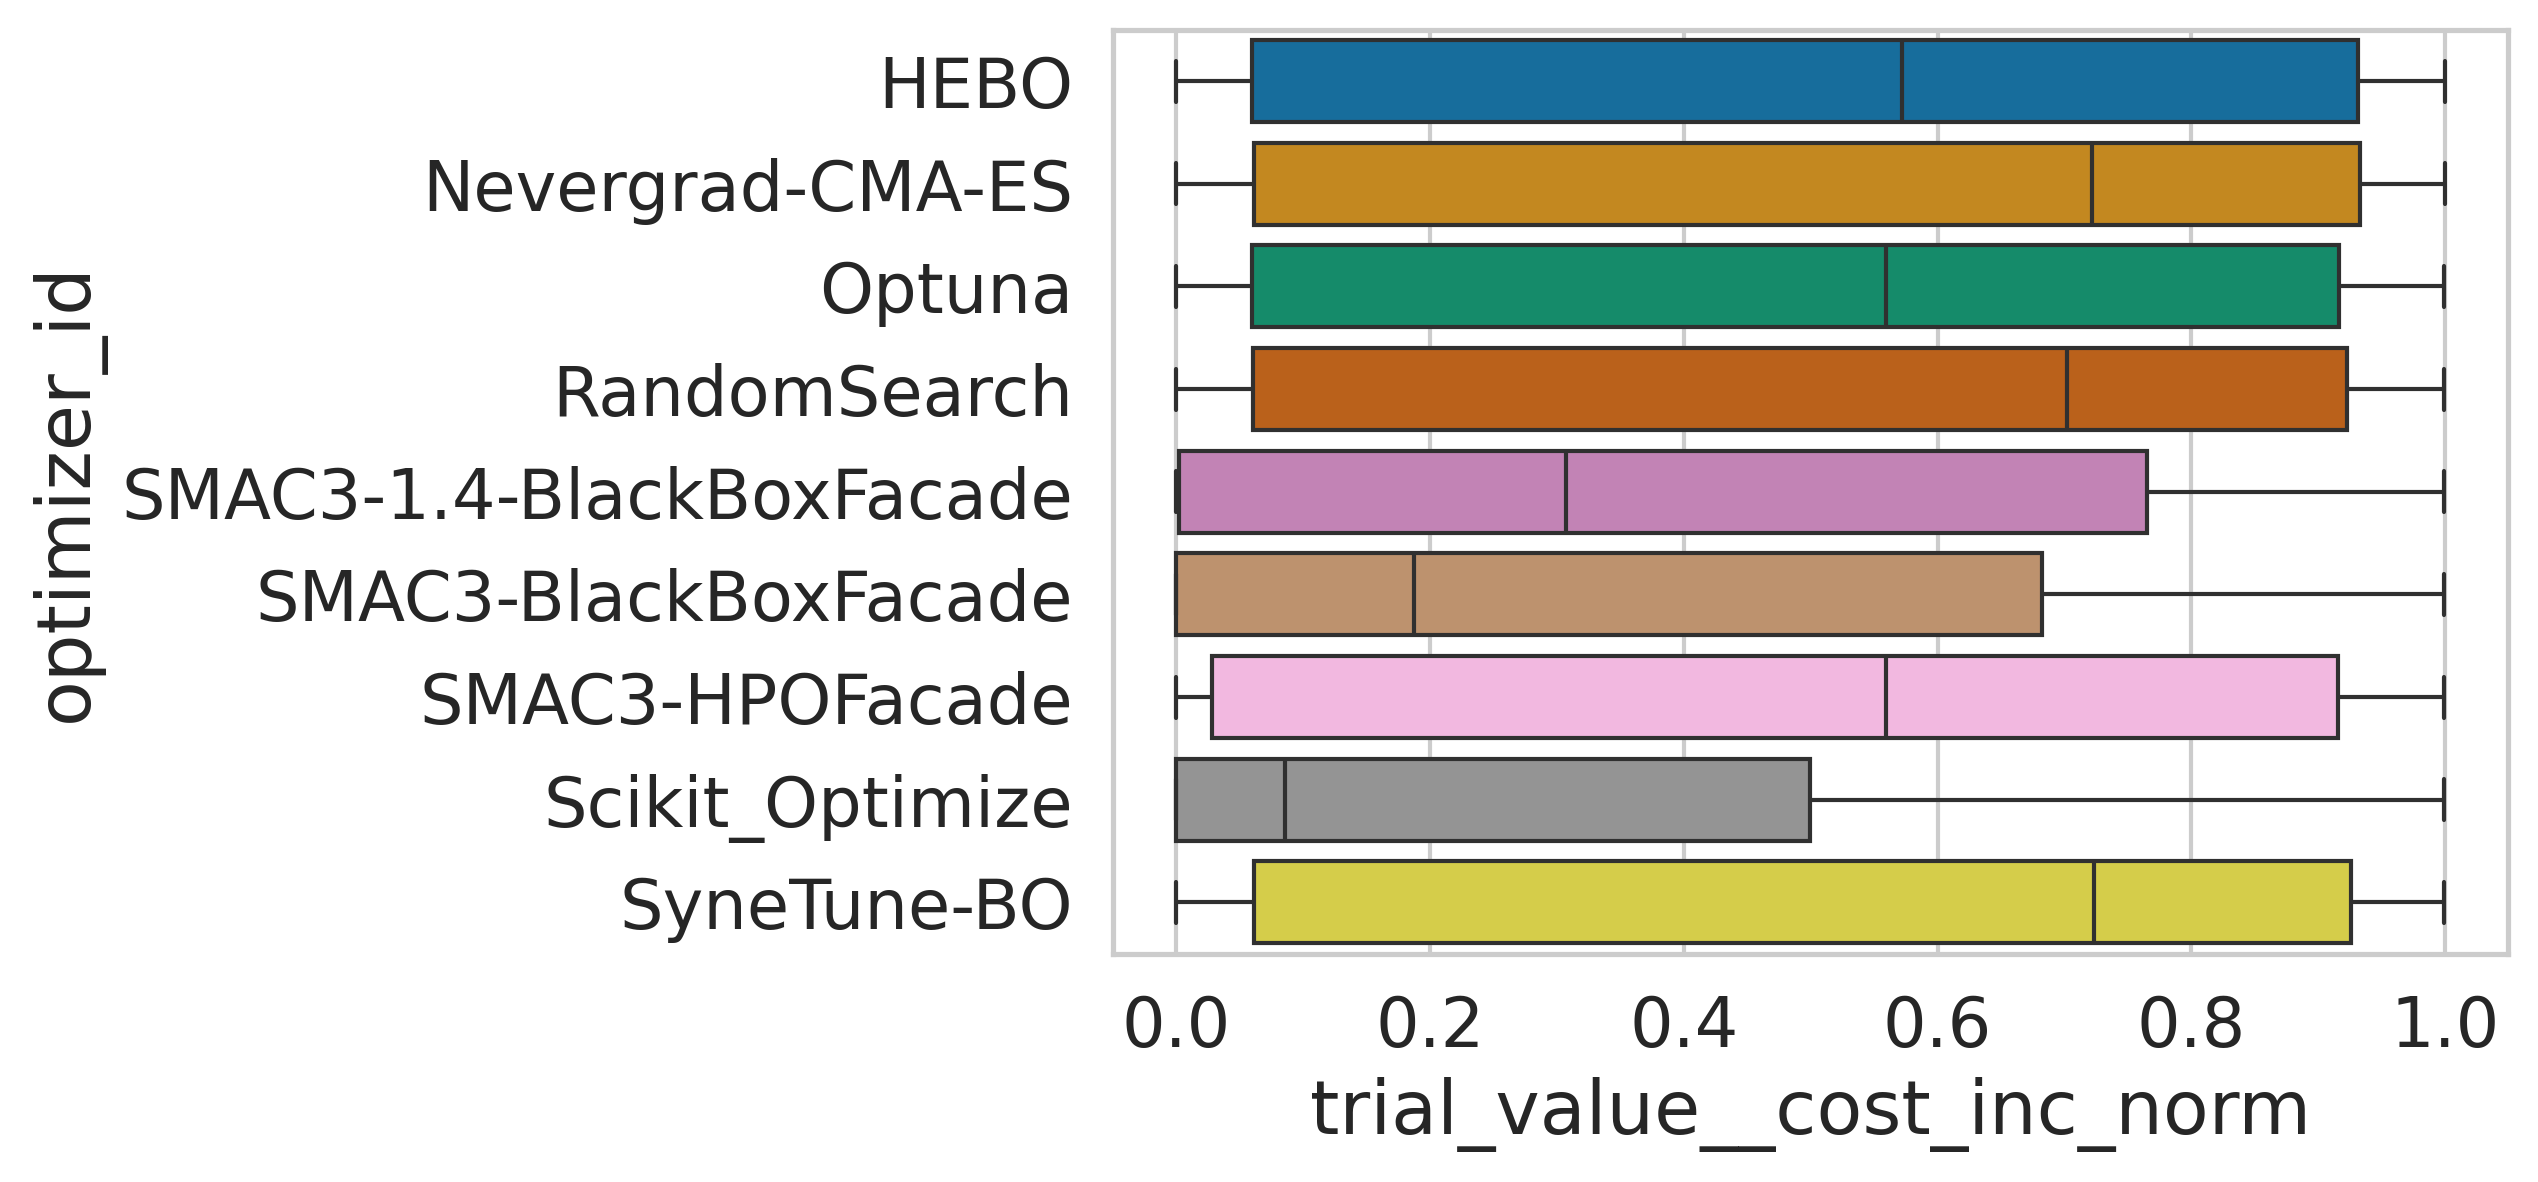

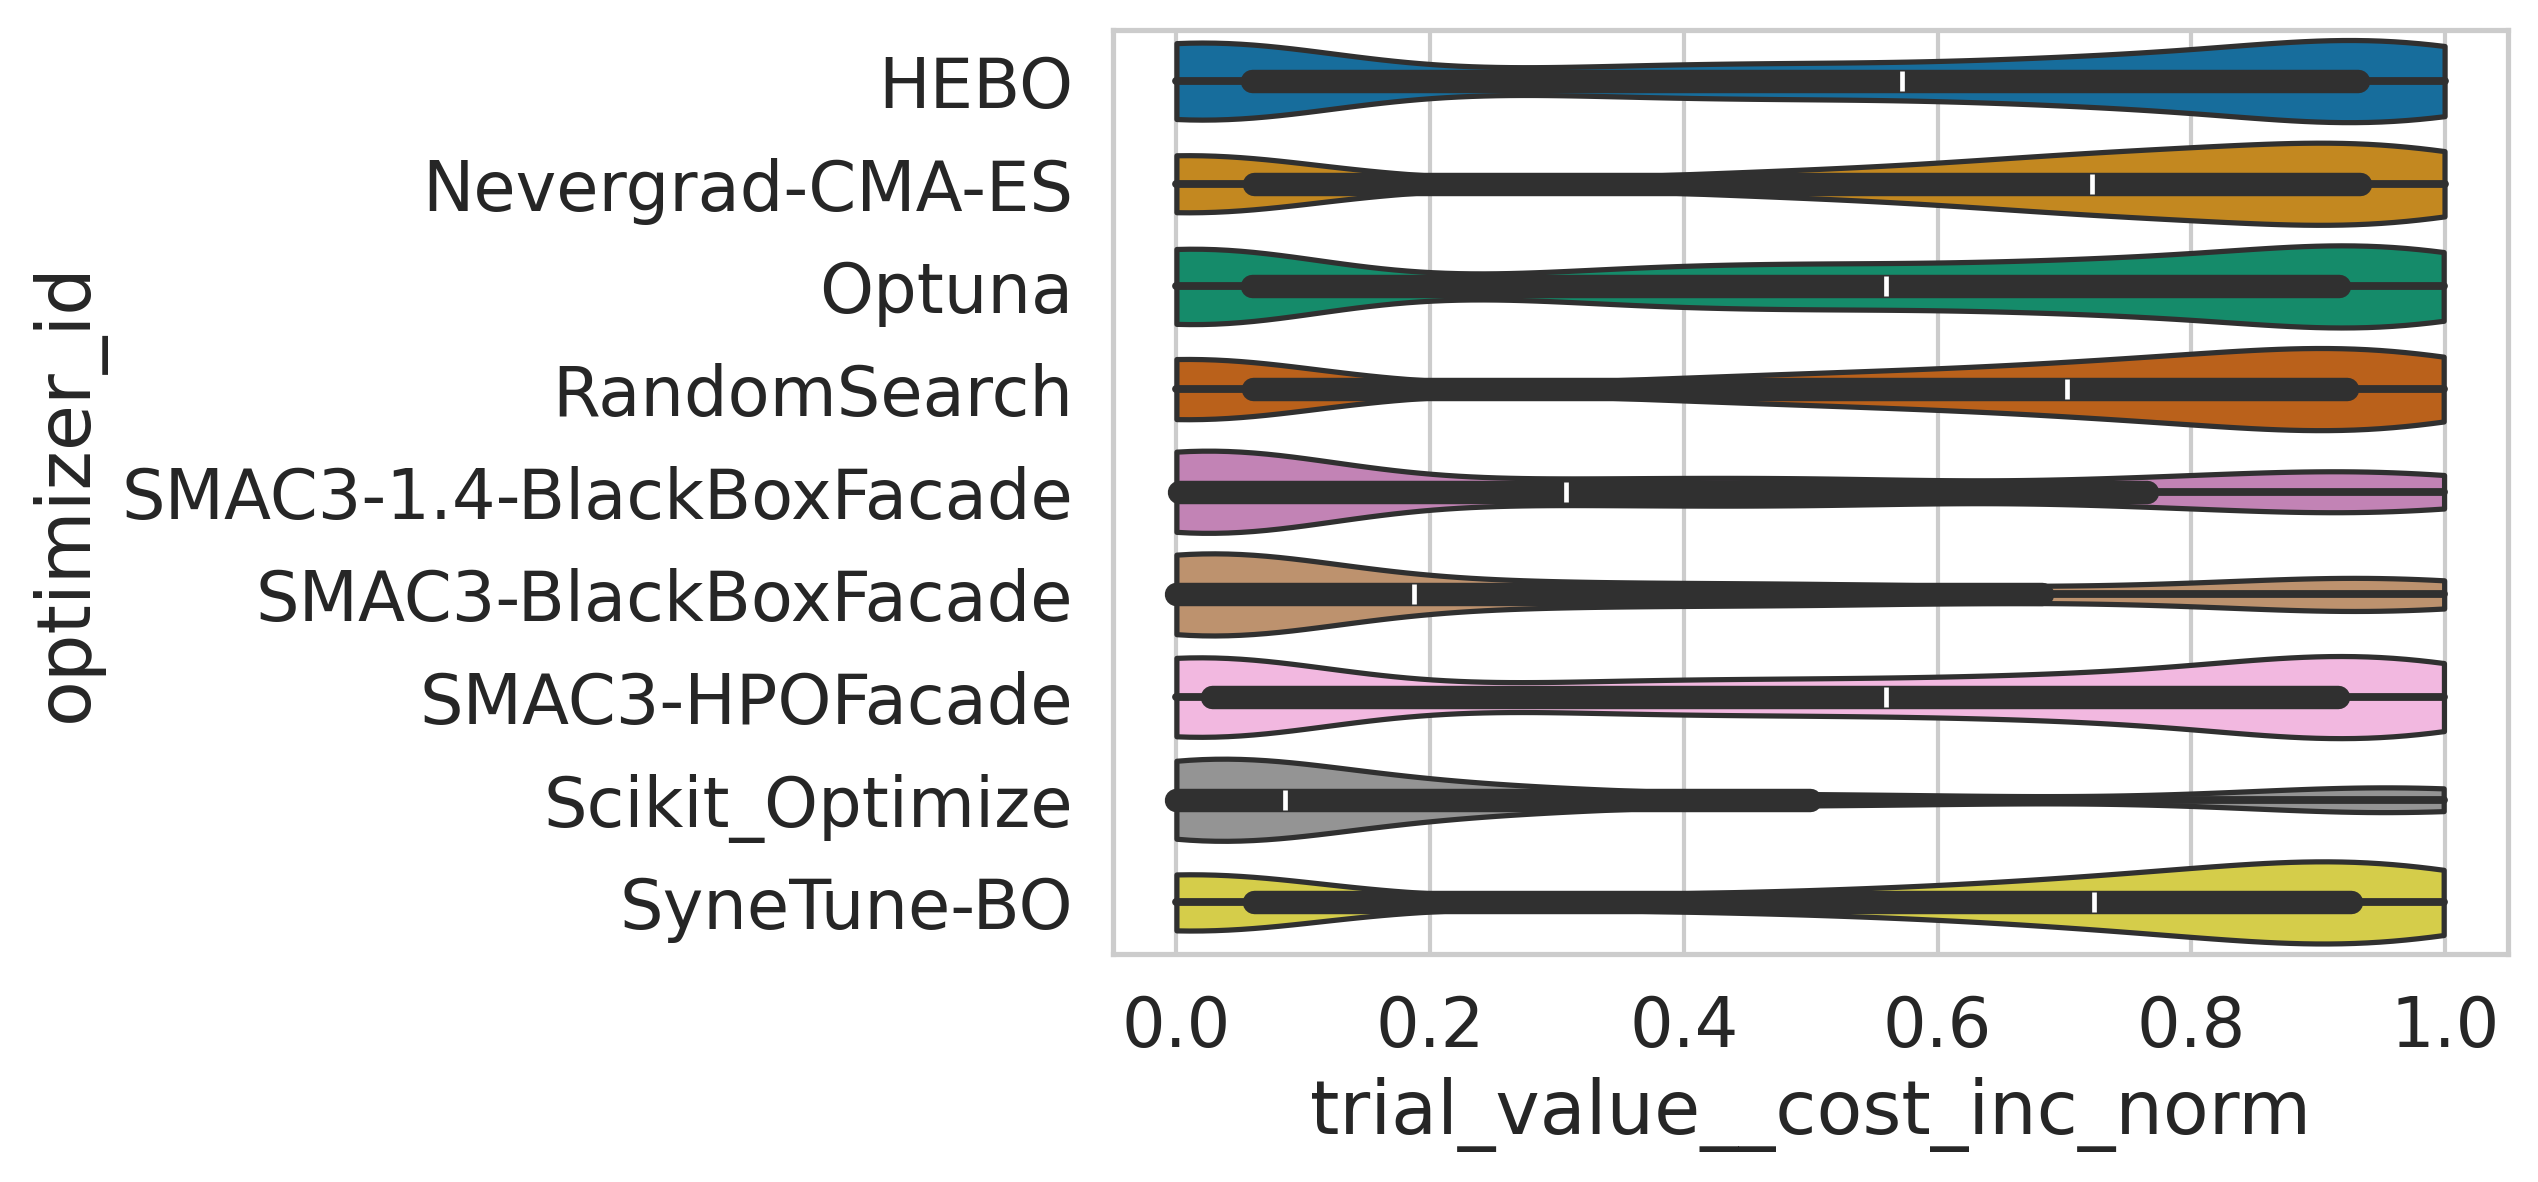

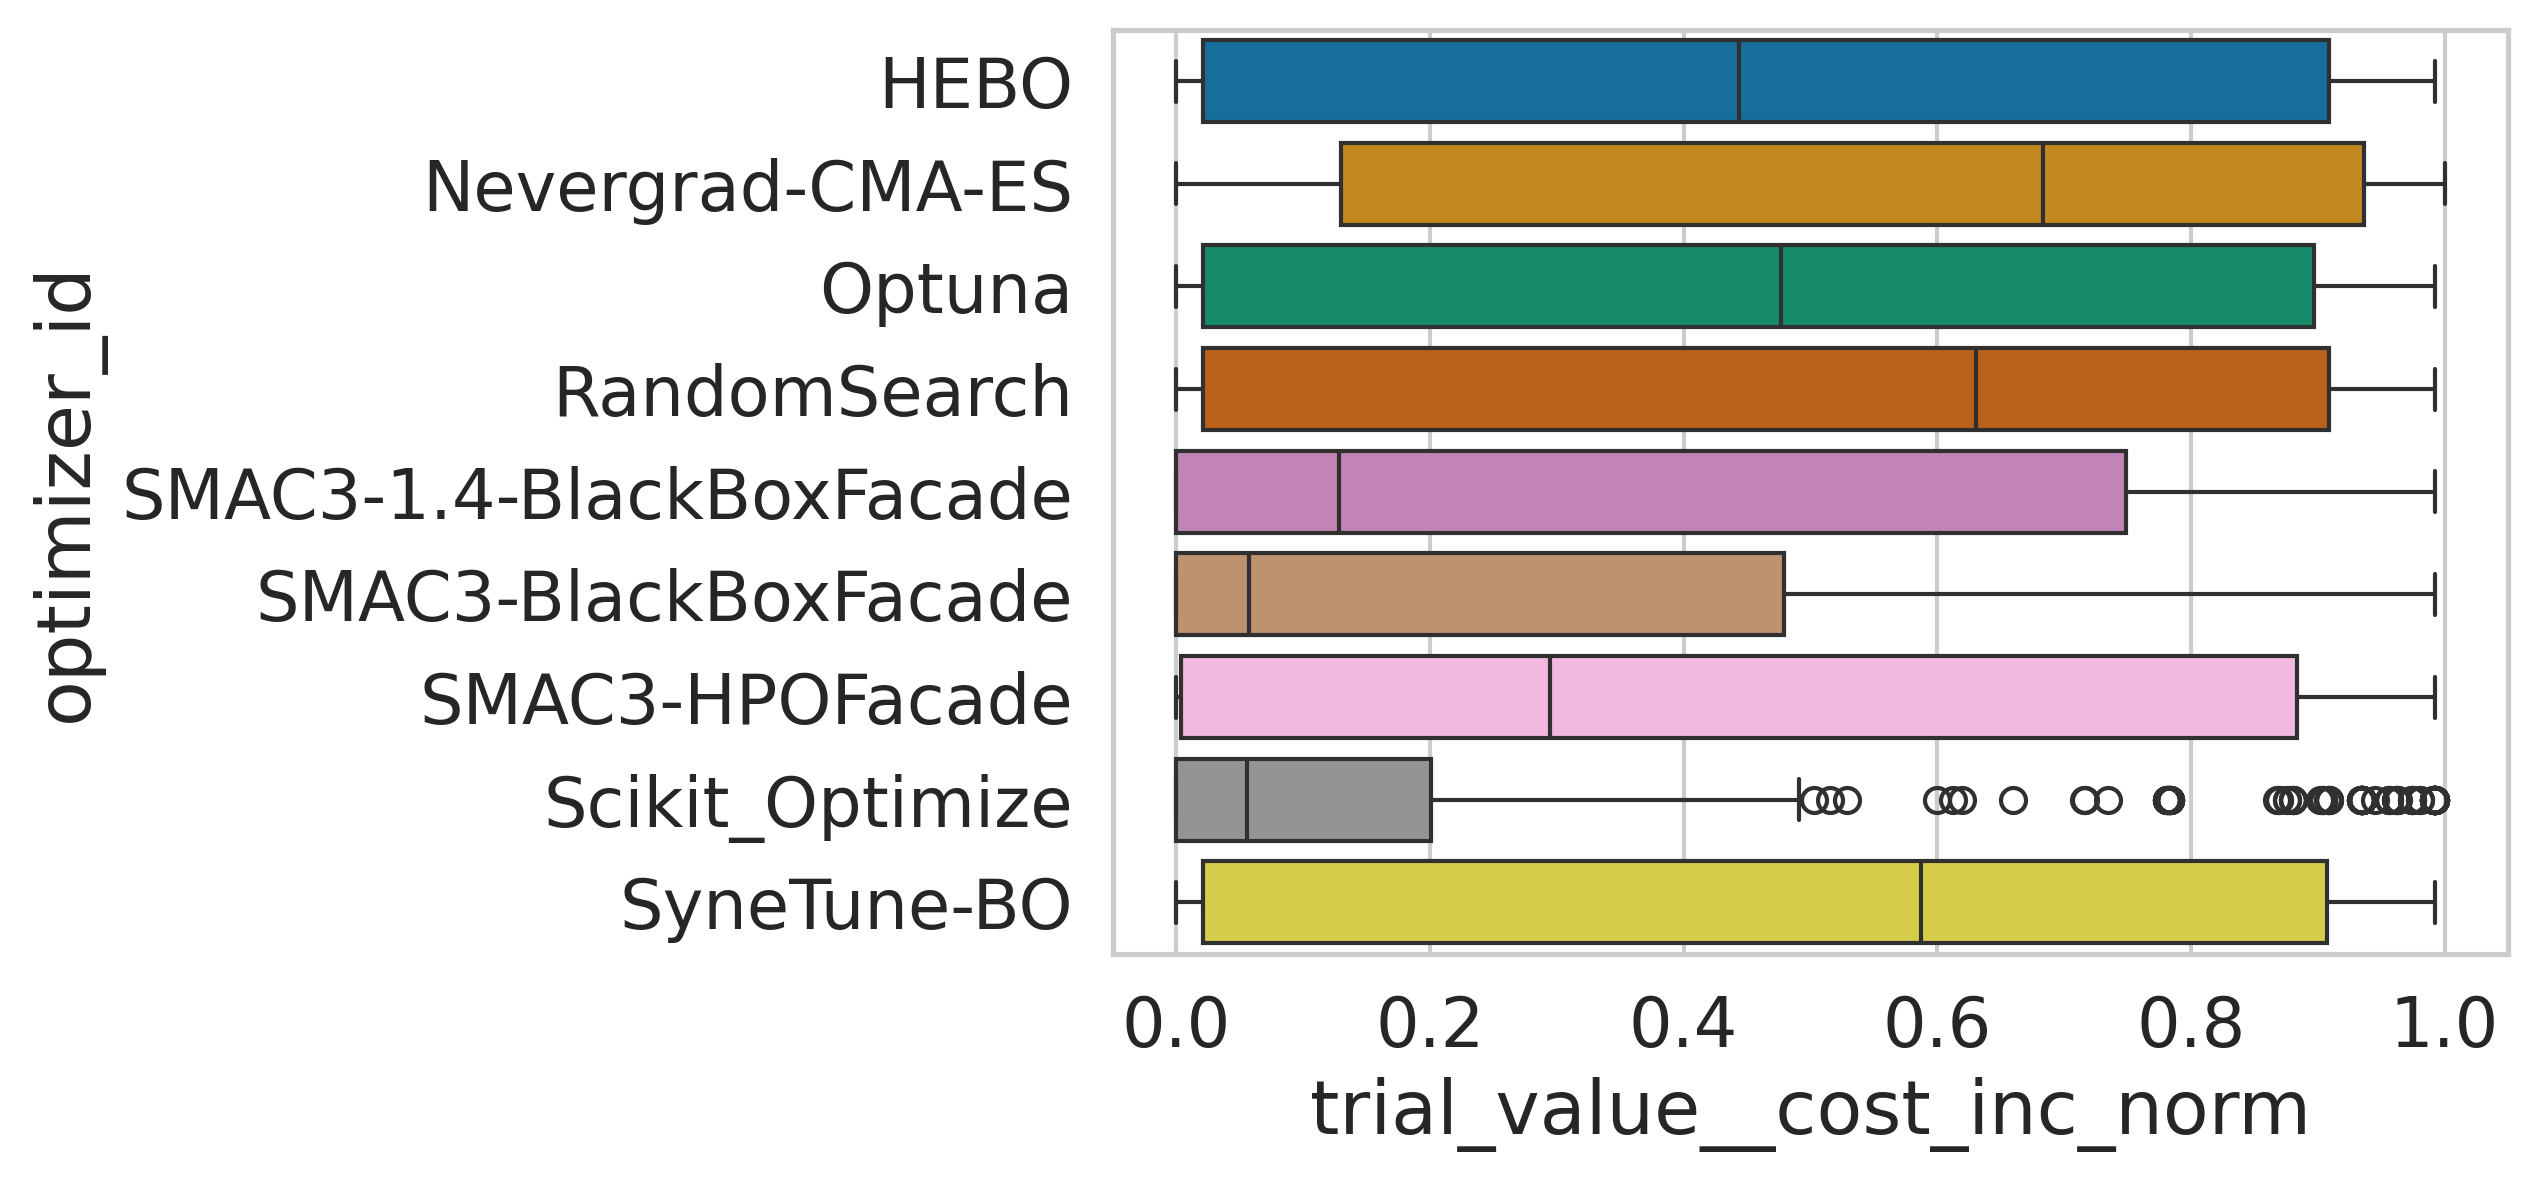

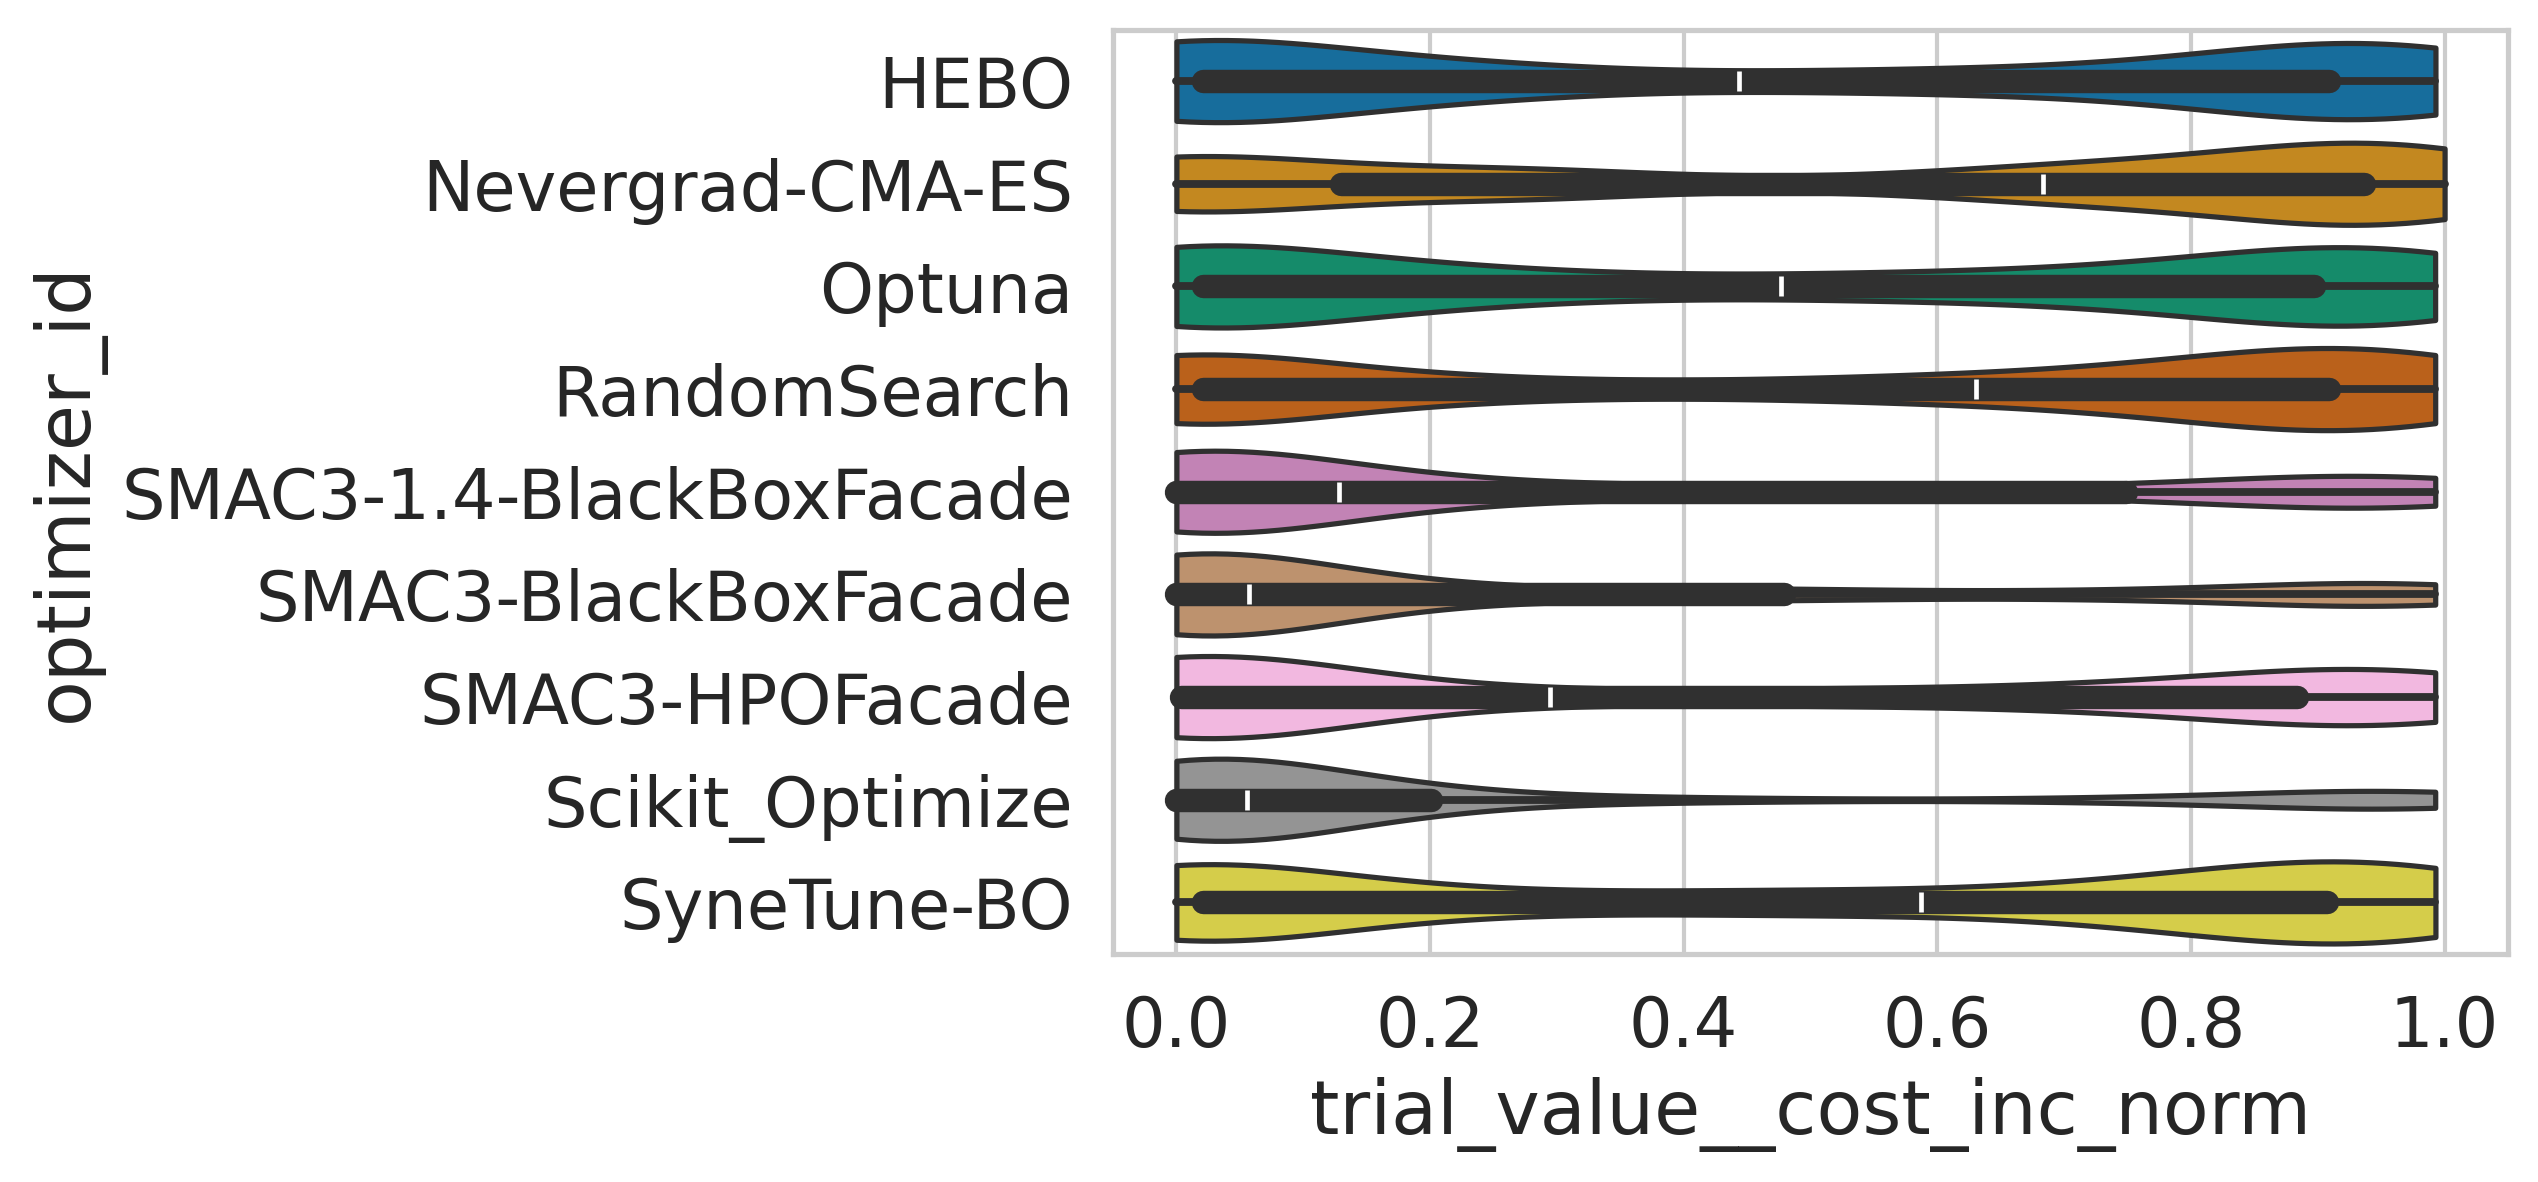

In [8]:
from carps.analysis.final_performance import plot_final_performance_boxplot, plot_final_performance_violinplot

boxplot_kwargs = dict()

for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_final_performance_boxplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_boxplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)
    fig, ax = plot_final_performance_violinplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_violinplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)

In [ ]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)